# Practice 2 (Two-class Classification)

## 1) Cat-Dog (noise size)
Train a logistic regression model with input 𝑥 representing nose size, and output 𝑦 representing class (cat/dog), <br>
– The data can be found in the file cat-dog.csv <br>
– Use random train/test split with 33% of the samples for testing <br>
Modify your program to use two inputs, nose size and ear shape.

       nose       ear  class
0  0.859593  0.298499      1
1  0.027629  0.338085      0
2  0.899156  0.859480      1
3  0.899936  0.340478      1
4  0.524106  0.138120      0

First Five Data = 
[[0.33337269 0.         0.        ]
 [0.84630364 1.         1.        ]
 [0.20367644 0.         0.        ]
 [0.70610759 1.         1.        ]
 [0.9912032  1.         1.        ]]

Confusion Matrix = 
[[ 8  4]
 [ 1 14]]

Accuracy Score = 0.8148148148148148


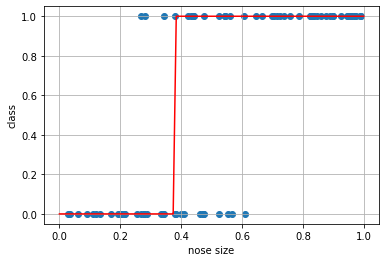

In [100]:
# with one feature
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('cat-dog.csv')
print(df.head())
x = df['nose']
y = df['class']
### print(f'\nx and y are sequence of numbers {x.shape}, {y.shape}') >>> (79,), (79,)
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
### print(f'x and y are column vectors {x.shape}, {y.shape}') >>> (79, 1), (79, 1)

plt.scatter(x,y)
plt.grid(1)
plt.xlabel('nose size')
plt.ylabel('class')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=3)

# train model
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

xx = np.linspace(0, 1, 100).reshape(-1,1)
plt.plot(xx, model.predict(xx), 'r')

y_pred = model.predict(X_test).reshape(-1,1)
## np.hstack: stack arrays in sequence horizontally (column wise).
print(f'\nFirst Five Data = \n{np.hstack((X_test, y_test, y_pred))[0:5]}')
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')

## 2) Cat-Dog (noise and ear sizes)


First Five Data = 
[[0.33337269 0.00891506 0.         0.        ]
 [0.84630364 0.87986644 1.         1.        ]
 [0.20367644 0.23316769 0.         0.        ]
 [0.70610759 0.38431362 1.         1.        ]
 [0.9912032  0.58518164 1.         1.        ]]

Confusion Matrix = 
[[12  0]
 [ 0 15]]

Accuracy Score = 1.0


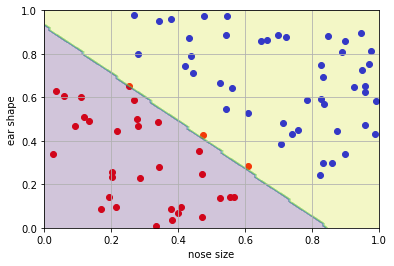

In [84]:
# with two features
x1 = df['nose']
x2 = df['ear']
y = df['class']
### print(f'\nx1, x2, and y are sequence of numbers {x1.shape}, {x2.shape}, {y.shape}') >>> (79,), (79,), (79,)
X = np.array([x1,x2]).T
y = np.array(y)
### print(f'y = {y}')
### print(f'X and y are column vectors {X.shape}, {y.shape}') >>> (79, 2), (79,)

plt.scatter(X[y==0,0],X[y==0,1],c='r')
plt.scatter(X[y==1,0],X[y==1,1],c='b')
plt.grid(1)
plt.xlabel('nose size')
plt.ylabel('ear shape')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
model = LogisticRegression()
model.fit(X_train, y_train)

# color plot based on predicted class
xp1, xp2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)

# convert vectorized meshgrid to dataset
Xp_data = np.hstack((xp1_v, xp2_v)) ## or np.append(xp1_v, xp2_v, axis=1)
z = model.predict(Xp_data).reshape(xp1.shape) ### print(z.shape) >>> (100, 100)
plt.contourf(xp1, xp2, z, alpha=0.25)

y_pred = model.predict(X_test)
print(f'\nFirst Five Data = \n{np.hstack((X_test, y_test.reshape(-1,1), y_pred.reshape(-1,1)))[:5]}')
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')

## 3) 0 and 1 digits-classifier
•  The MNIST dataset is a dataset of images (28*28 pixels) of handwritten digits (0-9)<br>
•  Train a classifier to classify if an image is a 0 or a 1<br>
– Use images (all or some) in the folder training for training<br>
– Use images (all or some) in the folder testing for testing<br>
<img align="left" src="MNIST.JPG">

x_0.shape = (1000, 784), y_0.shape = (1000, 1)
x_1.shape = (1000, 784), y_1.shape = (1000, 1)



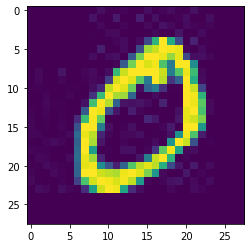

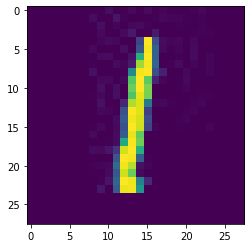

X_train.shape: (2000, 784), y_train.shape: (2000, 1)
X_test.shape: (400, 784), y_test.shape: (400, 1)
y_pred.shape = (400,)

Confusion Matrix = 
[[200   0]
 [  0 200]]

Accuracy Score = 1.0
Model Coeficient Shape = (1, 784)


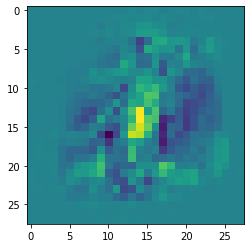

In [113]:
import os # to listdir
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from PIL import Image # python image lib
from sklearn.metrics import confusion_matrix, accuracy_score

folder_training_0 = 'MNIST/training/0/' # 5923 ### print(folder_training_0) >>> MNIST/training/0/
folder_training_1 = 'MNIST/training/1/' # 6742
folder_testing_0 = 'MNIST/testing/0/' # 980
folder_testing_1 = 'MNIST/testing/1/' # 1135
classes = [0,1]
im_width = 28

def get_data(folder, im_width, label, n_samples):
    file_names = os.listdir(folder)
    ## np.empty: returns a new array of given shape and type, without initializing entries.
    x = np.empty((n_samples,im_width**2))
    y = np.empty((n_samples,1))
    for i in range(n_samples):
        path = folder + file_names[i]
        im = Image.open(path).convert('L')
        im_array = asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]
    return x, y

# training data
x_0, y_0 = get_data(folder_training_0, 28, 0, 1000)
x_1, y_1 = get_data(folder_training_1, 28, 1, 1000)
### print(f'x_0 = \n{x_0[:5,]}\n\ny_0 = \n{y_0[:5,]}\n')
### print(f'x_1 = \n{x_1[:5,]}\n\ny_1 = \n{y_1[:5,]}\n')
print(f'x_0.shape = {x_0.shape}, y_0.shape = {y_0.shape}')
print(f'x_1.shape = {x_1.shape}, y_1.shape = {y_1.shape}\n')

# plot to check if images loaded successfully
plt.imshow(x_0[0,:].reshape(im_width,im_width))
plt.show()
plt.imshow(x_1[0,:].reshape(im_width,im_width))
plt.show()

# combine data samples for training
## np.vstack: stack arrays in sequence vertically (row wise).
X_train = np.vstack((x_0, x_1))
y_train = np.vstack((y_0, y_1))
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

# train LogisticRegression model
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

# testing data
x_0_test, y_0_test = get_data(folder_testing_0, 28, 0, 200)
x_1_test, y_1_test = get_data(folder_testing_1, 28, 1, 200)
# combine data samples for testing
X_test = np.vstack((x_0_test, x_1_test))
y_test = np.vstack((y_0_test, y_1_test))
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

y_pred = model.predict(X_test)
### print(f'y_pred = {y_pred[195:205]}') >>> [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
print(f'y_pred.shape = {y_pred.shape}')
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')
print(f'Model Coeficient Shape = {model.coef_.shape}')
plt.imshow(model.coef_.reshape(im_width, im_width))
plt.show()